In [1]:
seed = 3906303

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


import gzip
import random
np.random.seed(seed)
random.seed(seed)

C:\Users\Mashal\anaconda3\envs\py39_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
df_icu_filtered = pd.read_csv("bg_filtered_chartevents.csv")
df_icu_filtered

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,NaN,2180-07-23 21:45:00,2180-07-23 22:30:00,220621,115.0,115.0,mg/dL,1
1,10000690,25860671,37081114,84407.0,2150-11-04 10:00:00,2150-11-04 09:39:00,225664,117.0,117.0,NaN,0
2,10000690,25860671,37081114,NaN,2150-11-03 02:56:00,2150-11-03 04:22:00,220621,77.0,77.0,mg/dL,0
3,10000690,25860671,37081114,NaN,2150-11-04 03:03:00,2150-11-04 03:44:00,220621,84.0,84.0,mg/dL,0
4,10000690,25860671,37081114,NaN,2150-11-04 17:54:00,2150-11-04 18:41:00,220621,120.0,120.0,mg/dL,1
...,...,...,...,...,...,...,...,...,...,...,...
1814457,19999987,23865745,36195440,68756.0,2145-11-04 02:00:00,2145-11-04 05:07:00,225664,112.0,112.0,NaN,0
1814458,19999987,23865745,36195440,69532.0,2145-11-03 08:00:00,2145-11-03 07:58:00,225664,122.0,122.0,NaN,0
1814459,19999987,23865745,36195440,96092.0,2145-11-04 08:00:00,2145-11-04 08:11:00,225664,127.0,127.0,NaN,0
1814460,19999987,23865745,36195440,NaN,2145-11-03 01:35:00,2145-11-03 02:42:00,220621,113.0,113.0,mg/dL,1


In [4]:
bg_icu = df_icu_filtered
bg_icu.sort_values(by=['subject_id', 'charttime'])

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,NaN,2180-07-23 21:45:00,2180-07-23 22:30:00,220621,115.0,115.0,mg/dL,1
2,10000690,25860671,37081114,NaN,2150-11-03 02:56:00,2150-11-03 04:22:00,220621,77.0,77.0,mg/dL,0
3,10000690,25860671,37081114,NaN,2150-11-04 03:03:00,2150-11-04 03:44:00,220621,84.0,84.0,mg/dL,0
1,10000690,25860671,37081114,84407.0,2150-11-04 10:00:00,2150-11-04 09:39:00,225664,117.0,117.0,NaN,0
4,10000690,25860671,37081114,NaN,2150-11-04 17:54:00,2150-11-04 18:41:00,220621,120.0,120.0,mg/dL,1
...,...,...,...,...,...,...,...,...,...,...,...
1814458,19999987,23865745,36195440,69532.0,2145-11-03 08:00:00,2145-11-03 07:58:00,225664,122.0,122.0,NaN,0
1814456,19999987,23865745,36195440,68756.0,2145-11-03 20:00:00,2145-11-03 20:00:00,225664,105.0,105.0,NaN,0
1814457,19999987,23865745,36195440,68756.0,2145-11-04 02:00:00,2145-11-04 05:07:00,225664,112.0,112.0,NaN,0
1814461,19999987,23865745,36195440,NaN,2145-11-04 05:01:00,2145-11-04 05:51:00,220621,100.0,100.0,mg/dL,0


In [5]:
bg_icu.sort_values(by=['value'], ascending=False).head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
813554,14478278,29643008,30892963,94048.0,2171-11-22 22:00:00,2171-11-23 08:40:00,225664,1653550.0,1653550.0,NaN,0
449808,12468016,25074766,37541173,NaN,2138-12-11 08:46:00,2138-12-11 08:53:00,226537,1276100.0,1276100.0,mg/dL,1
859388,14748622,24689251,38602790,NaN,2121-06-30 12:07:00,2121-07-01 12:00:00,220621,999999.0,999999.0,NaN,0
898865,14973395,26267783,30262829,NaN,2143-03-06 19:15:00,2143-03-07 11:21:00,220621,999999.0,999999.0,NaN,0
1390752,17661056,29891458,36377514,NaN,2177-10-05 14:14:00,2177-10-06 04:12:00,220621,999999.0,999999.0,mg/dL,0


In [6]:
bg_icu['charttime'] = pd.to_datetime(
    bg_icu['charttime'],
    format='%Y-%m-%d %H:%M:%S',   # matches 2180-07-23 21:45:00
    errors='raise'               # or 'coerce' to turn bad rows into NaT
)
bg_icu['storetime'] = pd.to_datetime(
    bg_icu['storetime'],
    format='%Y-%m-%d %H:%M:%S',   # matches 2180-07-23 21:45:00
    errors='raise'               # or 'coerce' to turn bad rows into NaT
)

In [7]:
bg_icu['valueuom'].value_counts()

valueuom
mg/dL    766532
Name: count, dtype: int64

In [8]:
print(bg_icu[bg_icu['value'] < 2656].shape)
print(bg_icu[bg_icu['value'] > 2656].shape)

(1814336, 11)
(126, 11)


In [9]:
bg_icu = bg_icu[(bg_icu['value'] < 2656) & (bg_icu['value'] > 10)]

In [10]:
bg_icu.sort_values(by=['value'], ascending=False).head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
815029,14486307,29356263,36290136,NaN,2188-01-11 02:59:00,2188-01-11 05:32:00,220621,2650.0,2650.0,mg/dL,1
815015,14486307,29356263,36290136,NaN,2187-12-29 14:09:00,2187-12-29 15:49:00,220621,2600.0,2600.0,mg/dL,1
1059308,15816613,20786142,37630991,NaN,2181-11-23 02:04:00,2181-11-23 03:25:00,220621,2474.0,2474.0,mg/dL,1
799544,14392310,22267572,30763023,NaN,2178-08-13 01:44:00,2178-08-13 02:51:00,220621,2440.0,2440.0,mg/dL,1
990820,15465739,28798031,38185691,NaN,2137-03-14 17:18:00,2137-03-14 20:33:00,220621,2323.0,2323.0,mg/dL,1


In [11]:
bg_icu['subject_id'].nunique()

64331

In [12]:
bg_icu['subject_id'].nunique()

64331

# Split Dataset into Training, Validation and Testing Datasets

In [13]:
# Get unique patient ids
unique_subjects = bg_icu['subject_id'].unique()

train_subjects, test_subjects = train_test_split(unique_subjects, test_size=0.2, random_state=seed)
train_subjects, test_subjects

(array([10464977, 10523428, 13633590, ..., 10878414, 14456616, 12617403]),
 array([19898032, 18047910, 16667783, ..., 18667813, 16172520, 19414662]))

In [14]:
train_subjects, val_subjects = train_test_split(train_subjects, test_size=0.25, random_state=seed)

In [15]:
bg_icu['subject_id'].isin(test_subjects).sum()

np.int64(365744)

In [16]:
bg_icu['subject_id'].isin(train_subjects).sum()

np.int64(1086868)

In [17]:
bg_icu['valueuom'].isna().sum()

np.int64(1047680)

### Creating sequenced data

Here we create the data to be fed into the model. Each row of data in the X datasets is a sequence of BG measurements. The Y datasets contain a BG reading that follows directly from that sequence after.

The approach we took is so that a sequence of measurements (starting from the first) is created of certain length from each ICU admission, which is taken as the X, and the following value after the sequence is taken as the Y. Then the window is slid over by one so that the sequence is slightly different, creating a new X value and a new following Y value. This process is repeated until the end of the ICU admission measurement sequence is reached, then a new ICU admission is chosen, until all ICU admissions have had their sequences recorded.

In [18]:
df_train = bg_icu[bg_icu['subject_id'].isin(train_subjects)]
df_train.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,NaN,2180-07-23 21:45:00,2180-07-23 22:30:00,220621,115.0,115.0,mg/dL,1
7,10000980,26913865,39765666,64209.0,2189-06-27 10:00:00,2189-06-27 10:10:00,225664,110.0,110.0,NaN,0
8,10000980,26913865,39765666,64209.0,2189-06-27 16:00:00,2189-06-27 16:24:00,225664,109.0,109.0,NaN,0
9,10001217,24597018,37067082,NaN,2157-11-21 03:16:00,2157-11-21 04:53:00,220621,113.0,113.0,mg/dL,1
10,10001217,27703517,34592300,80429.0,2157-12-19 22:00:00,2157-12-19 22:11:00,225664,145.0,145.0,NaN,0


In [19]:
df_val = bg_icu[bg_icu['subject_id'].isin(val_subjects)]
df_val.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
1,10000690,25860671,37081114,84407.0,2150-11-04 10:00:00,2150-11-04 09:39:00,225664,117.0,117.0,NaN,0
2,10000690,25860671,37081114,NaN,2150-11-03 02:56:00,2150-11-03 04:22:00,220621,77.0,77.0,mg/dL,0
3,10000690,25860671,37081114,NaN,2150-11-04 03:03:00,2150-11-04 03:44:00,220621,84.0,84.0,mg/dL,0
4,10000690,25860671,37081114,NaN,2150-11-04 17:54:00,2150-11-04 18:41:00,220621,120.0,120.0,mg/dL,1
5,10000690,25860671,37081114,NaN,2150-11-05 05:36:00,2150-11-05 06:28:00,220621,107.0,107.0,mg/dL,1


In [20]:
df_test = bg_icu[bg_icu['subject_id'].isin(test_subjects)]
df_test.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
15,10001843,26133978,39698942,88257.0,2134-12-06 08:00:00,2134-12-06 07:49:00,225664,62.0,62.0,NaN,0
16,10001843,26133978,39698942,NaN,2134-12-05 18:11:00,2134-12-05 19:13:00,220621,133.0,133.0,mg/dL,1
17,10001843,26133978,39698942,NaN,2134-12-06 03:29:00,2134-12-06 04:17:00,220621,108.0,108.0,mg/dL,1
18,10001884,26184834,37510196,NaN,2131-01-11 06:31:00,2131-01-11 07:52:00,220621,148.0,148.0,mg/dL,1
19,10001884,26184834,37510196,NaN,2131-01-11 06:37:00,2131-01-11 06:43:00,226537,140.0,140.0,mg/dL,1


In [21]:
df_train.sort_values(by=['subject_id','hadm_id','charttime'])

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,NaN,2180-07-23 21:45:00,2180-07-23 22:30:00,220621,115.0,115.0,mg/dL,1
7,10000980,26913865,39765666,64209.0,2189-06-27 10:00:00,2189-06-27 10:10:00,225664,110.0,110.0,NaN,0
8,10000980,26913865,39765666,64209.0,2189-06-27 16:00:00,2189-06-27 16:24:00,225664,109.0,109.0,NaN,0
9,10001217,24597018,37067082,NaN,2157-11-21 03:16:00,2157-11-21 04:53:00,220621,113.0,113.0,mg/dL,1
10,10001217,27703517,34592300,80429.0,2157-12-19 22:00:00,2157-12-19 22:11:00,225664,145.0,145.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1814458,19999987,23865745,36195440,69532.0,2145-11-03 08:00:00,2145-11-03 07:58:00,225664,122.0,122.0,NaN,0
1814456,19999987,23865745,36195440,68756.0,2145-11-03 20:00:00,2145-11-03 20:00:00,225664,105.0,105.0,NaN,0
1814457,19999987,23865745,36195440,68756.0,2145-11-04 02:00:00,2145-11-04 05:07:00,225664,112.0,112.0,NaN,0
1814461,19999987,23865745,36195440,NaN,2145-11-04 05:01:00,2145-11-04 05:51:00,220621,100.0,100.0,mg/dL,0


In [22]:
df_train['stay_id'].value_counts().describe()

count    55248.000000
mean        19.672531
std         36.157448
min          1.000000
25%          3.000000
50%          9.000000
75%         22.000000
max        835.000000
Name: count, dtype: float64

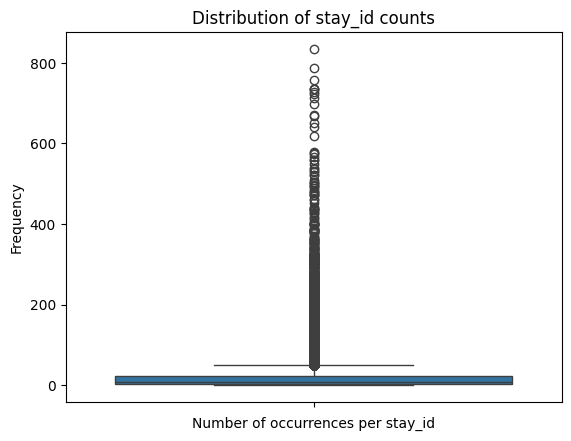

In [23]:
# Get counts
stay_counts = df_train['stay_id'].value_counts()

# Plot histogram of those counts
sns.boxplot(stay_counts)  # Optional: adjust bins

plt.xlabel('Number of occurrences per stay_id')
plt.ylabel('Frequency')
plt.title('Distribution of stay_id counts')
plt.show()


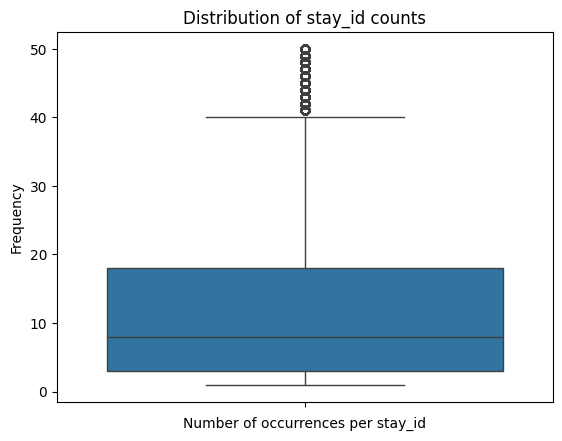

In [24]:
counts = df_train['stay_id'].value_counts()

Q1 = counts.quantile(0.25)
Q3 = counts.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

valid_stays = counts[(counts >= lower_bound) & (counts <= upper_bound)].index

df_filtered = df_train[df_train['stay_id'].isin(valid_stays)]
# Plot boxplot of those counts
sns.boxplot(df_filtered['stay_id'].value_counts())

plt.xlabel('Number of occurrences per stay_id')
plt.ylabel('Frequency')
plt.title('Distribution of stay_id counts')
plt.show()

In [25]:
valid_stays = counts[(counts >= 2)].index
df_train = df_train[df_train['stay_id'].isin(valid_stays)]
df_train['stay_id'].value_counts()

stay_id
33566920    835
39510663    787
35629939    758
36032605    736
36066456    735
           ... 
37874609      2
35146551      2
35895962      2
34126363      2
31333195      2
Name: count, Length: 50726, dtype: int64

In [26]:
counts = df_val['stay_id'].value_counts()
valid_stays = counts[(counts >= 2)].index
df_val = df_val[df_val['stay_id'].isin(valid_stays)]
df_val['stay_id'].value_counts()

stay_id
30359303    1274
32380519     783
32696460     742
32652212     701
30271658     698
            ... 
36646626       2
37103625       2
31487402       2
37828893       2
31423388       2
Name: count, Length: 17100, dtype: int64

In [27]:
counts = df_test['stay_id'].value_counts()
valid_stays = counts[(counts >= 2)].index
df_test = df_test[df_test['stay_id'].isin(valid_stays)]
df_test['stay_id'].value_counts()

stay_id
33576993    961
31689230    652
34129924    616
36358936    599
30385743    577
           ... 
37311522      2
34679519      2
31414966      2
32183306      2
36369483      2
Name: count, Length: 17069, dtype: int64

In [28]:
icu_stays = df_train['stay_id'].unique()

In [29]:
df_train['stay_id'].value_counts()

stay_id
33566920    835
39510663    787
35629939    758
36032605    736
36066456    735
           ... 
37874609      2
35146551      2
35895962      2
34126363      2
31333195      2
Name: count, Length: 50726, dtype: int64

In [30]:
df_train.reset_index(drop=True)[df_train.reset_index(drop=True)['stay_id']==33566920]

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
1069130,19874859,23391430,33566920,701.0,2169-04-12 09:00:00,2169-04-12 09:45:00,225664,133.0,133.0,NaN,0
1069131,19874859,23391430,33566920,701.0,2169-04-12 10:00:00,2169-04-12 10:09:00,225664,132.0,132.0,NaN,0
1069132,19874859,23391430,33566920,701.0,2169-04-12 13:00:00,2169-04-12 13:36:00,225664,118.0,118.0,NaN,0
1069133,19874859,23391430,33566920,701.0,2169-04-12 15:00:00,2169-04-12 15:09:00,225664,138.0,138.0,NaN,0
1069134,19874859,23391430,33566920,701.0,2169-04-12 17:00:00,2169-04-12 17:01:00,225664,132.0,132.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1069960,19874859,23391430,33566920,NaN,2169-05-19 04:14:00,2169-05-19 05:11:00,220621,109.0,109.0,mg/dL,1
1069961,19874859,23391430,33566920,NaN,2169-05-20 03:55:00,2169-05-20 05:02:00,220621,150.0,150.0,mg/dL,1
1069962,19874859,23391430,33566920,NaN,2169-05-21 02:09:00,2169-05-21 03:18:00,220621,151.0,151.0,mg/dL,1
1069963,19874859,23391430,33566920,NaN,2169-05-22 01:27:00,2169-05-22 02:20:00,220621,98.0,98.0,mg/dL,0


In [32]:
df_stay['charttime'].astype('int64')

NameError: name 'df_stay' is not defined

### The below cell creates the data points. X train contains rows of 5 measurements in sequence each, with y train value being the following measurement taken directly after, which is to be predicted.

In [ ]:
X_test = []
y_test = []
for stay_id in icu_stays:
    # Gets the specific ICU stay data
    df_stay = df_test.loc[df_test['stay_id'] == stay_id].sort_values(by=['charttime']).reset_index(drop=True)
    for row in df_stay.itertuples():
        sequence = []
        i = 0
        j = row.Index

        if df_stay.shape[0] < 6 or df_stay.shape[0] - j >= 6:
            # This loop traverses 5 data points or until penultimate dataframe row, whichever comes first,
            # and appends all BG values to the sequence
            while i < 5 and j < df_stay.shape[0] - 1:
                sequence.append(df_stay.at[row.Index + i,'value'])
                i += 1
                j += 1
            if len(sequence) > 0:
                X_test.append(sequence)
                y_test.append(df_stay.at[row.Index + i,'value'])
            # This condition ensures that an icu stay with fewer than 6 measurements is added only once
            if df_stay.shape[0] < 6:
                break

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Masking(mask_value=0.0, input_shape=(None, 1)),  # allow variable time steps
    # Sets hidden and cell state vector shape/size
    tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

# Create an SGD optimizer
sgd = tf.keras.optimizers.SGD(
        learning_rate=0.01,   # default is 0.01
        momentum=0.9,         # 0.0 = vanilla SGD; 0.9 is common
        nesterov=False        # set True if you want Nesterov momentum
)

# Compile model with SGD
model.compile(
    loss='mse',
    optimizer=sgd,           # or simply optimizer='sgd'
    metrics=['mae']          # any metrics you care about
)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad to max length (say 5)
X_train = pad_sequences(X_train, maxlen=5, dtype='float32', padding='post')

# reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
y_train = np.array(y_train, dtype=np.float32)

In [ ]:
import time

start_time = time.time()
print(start_time)
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"\nTraining completed in {elapsed_time:.2f} seconds.")

Epoch 1/10
872519/872519 [==============================] - 3076s 4ms/step - loss: 204727.6562 - mae: 46.7486
Epoch 2/10
872519/872519 [==============================] - 2972s 3ms/step - loss: 4046.0701 - mae: 45.3810
Epoch 3/10
872519/872519 [==============================] - 3025s 3ms/step - loss: 4043.6011 - mae: 45.3775
Epoch 4/10
872519/872519 [==============================] - 2946s 3ms/step - loss: 4046.0117 - mae: 45.3933
Epoch 5/10
872519/872519 [==============================] - 2933s 3ms/step - loss: 4046.0637 - mae: 45.4016
Epoch 6/10
872519/872519 [==============================] - 3025s 3ms/step - loss: 4048.3232 - mae: 45.4137
Epoch 7/10
872519/872519 [==============================] - 3047s 3ms/step - loss: 4049.3232 - mae: 45.4207
Epoch 8/10
872519/872519 [==============================] - 2968s 3ms/step - loss: 4047.0815 - mae: 45.4038
Epoch 9/10
872519/872519 [==============================] - 2967s 3ms/step - loss: 4049.4353 - mae: 45.4171
Epoch 10/10
872519/872519 

In [ ]:
model.save("10_epoch_model")

INFO:tensorflow:Assets written to: 10_epoch_model\assets


INFO:tensorflow:Assets written to: 10_epoch_model\assets


In [ ]:
icu_stays = df_test['stay_id'].unique()

In [ ]:
X_test = []
y_test = []
for stay_id in icu_stays:
    # Gets the specific ICU stay data
    df_stay = df_test.loc[df_test['stay_id'] == stay_id].sort_values(by=['charttime']).reset_index(drop=True)
    for row in df_stay.itertuples():
        sequence = []
        i = 0
        j = row.Index

        if df_stay.shape[0] < 6 or df_stay.shape[0] - j >= 6:
            # This loop traverses 5 data points or until penultimate dataframe row, whichever comes first,
            # and appends all BG values to the sequence
            while i < 5 and j < df_stay.shape[0] - 1:
                sequence.append(df_stay.at[row.Index + i,'value'])
                i += 1
                j += 1
            if len(sequence) > 0:
                X_test.append(sequence)
                y_test.append(df_stay.at[row.Index + i,'value'])
            # This condition ensures that an icu stay with fewer than 6 measurements is added only once
            if df_stay.shape[0] < 6:
                break

## Initial results from using just sequential data as a feature

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
X_test = pad_sequences(
    X_test,
    maxlen=5,
    dtype='float32',
    padding='post'
)
X_test = X_test.reshape(-1, 5, 1)
y_test = np.array(y_test, dtype=np.float32)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

test_mse, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Built-in evaluate  ▶  MSE: {test_mse:.4f}   MAE: {test_mae:.4f}")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# … predict …
y_pred = model.predict(X_test, batch_size=256).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)          # <── here
rmse = math.sqrt(mse)                             # or math.sqrt(mean_squared_error(...))
r2  = r2_score(y_test, y_pred)

print(f"\nCustom metrics")
print(f"  MAE : {mae:.4f}")
print(f"  MSE : {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²  : {r2:.4f}")

X_test shape: (293676, 5, 1)
y_test shape: (293676,)
9178/9178 [==============================] - 35s 4ms/step - loss: 3871.6287 - mae: 41.6667
Built-in evaluate  ▶  MSE: 3871.6287   MAE: 41.6667
1148/1148 [==============================] - 9s 6ms/step

Custom metrics
  MAE : 41.6667
  MSE : 3871.6216
  RMSE: 62.2224
  R²  : -0.0215
